In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pywaffle import Waffle

In [34]:
df=pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [36]:
data=df.drop(columns={'AREA','DEV','REG','Type','Coverage'})
data

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,14,24,32,15,32,38,27,37,51,25
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1591,1153,847,620,540,467,459,278,263,282
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,930,909,875,1033,1018,1018,933,851,982,1121


In [37]:
data.rename(columns={"OdName":"Country","RegName":"Region","AreaName":"Continent"},inplace=True)
data

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,14,24,32,15,32,38,27,37,51,25
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1591,1153,847,620,540,467,459,278,263,282
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,930,909,875,1033,1018,1018,933,851,982,1121


In [38]:
data.set_index(("Country"),inplace=True)

In [39]:
data['Total']=data.sum(axis=1)

In [40]:
data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [132]:
data.isnull().sum().head()

Continent    0
Region       0
DevName      0
1980         0
1981         0
dtype: int64

In [135]:
five=data[[1980,1981,1982,1983,1984,1985]]
five

,1980,1981,1982,1983,1984,1985
Country,,,,,,
Afghanistan,16,39,39,47,71,340
Albania,1,0,0,0,0,0
Algeria,80,67,71,69,63,44
American Samoa,0,1,0,0,0,0
Andorra,0,0,0,0,0,0
Angola,1,3,6,6,4,3
Antigua and Barbuda,0,0,0,0,42,52
Argentina,368,426,626,241,237,196
Armenia,0,0,0,0,0,0


In [57]:
data.loc['American Samoa'].head()

Continent               Oceania
Region                Polynesia
DevName      Developing regions
1980                          0
1981                          1
Name: American Samoa, dtype: object

In [67]:
five.loc['Japan']

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: int64

In [70]:
print(data.loc['Japan',[1980,1981,1982,1983,1984,1985]])

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [76]:
###def asia_as:
    if data['Continent']=='Asia':
        print("True")
    else:
        print("False")

    
    

SyntaxError: invalid syntax (<ipython-input-76-99925a5ae680>, line 1)

In [102]:
condition = data['Continent'] == 'Asia'
condition

Country
Afghanistan                                              True
Albania                                                 False
Algeria                                                 False
American Samoa                                          False
Andorra                                                 False
Angola                                                  False
Antigua and Barbuda                                     False
Argentina                                               False
Armenia                                                  True
Australia                                               False
Austria                                                 False
Azerbaijan                                               True
Bahamas                                                 False
Bahrain                                                  True
Bangladesh                                               True
Barbados                                                False


In [101]:
data.columns

Index(['Continent',    'Region',   'DevName',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,     'Total'],
      dtype='object')

In [109]:
data[condition].sum()

Continent    AsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAsiaAs...
Region       Southern AsiaWestern AsiaWestern AsiaWestern A...
DevName      Developing regionsDeveloping regionsDeveloping...
1980                                                     31025
1981                                                     34314
1982                                                     30214
1983                                                     24696
1984                                                     27274
1985                                                     23850
1986                                                     28739
1987                                                     43203
1988                                                     47454
1989                                                     60256
1990                                                     72829
1991                                                     89964
1992                                                   

In [105]:
conditions=data['Region']=='Southern Asia'
conditions.head()

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
Name: Region, dtype: bool

In [106]:
data[conditions]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [17]:
data[(data['Continent']=='Asia') & (data['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [13]:
haiti=data.loc['Haiti',[2005,2006,2007,2008,2009,2010,2011,2012,2013]]
haiti

2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

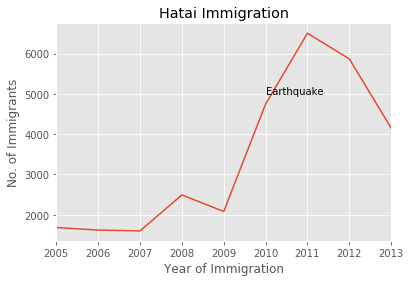

In [14]:
plt.style.use('ggplot')
haiti.plot(kind='line')
plt.title('Hatai Immigration')
plt.ylabel("No. of Immigrants")
plt.xlabel("Year of Immigration")
plt.text(2010,5000,'Earthquake')
plt.show()

In [25]:
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [9]:
ci=data.loc[['India','China'],range(1980,2014)]   #years is variable and variable cant be in quotation # no need to convert into years.
ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


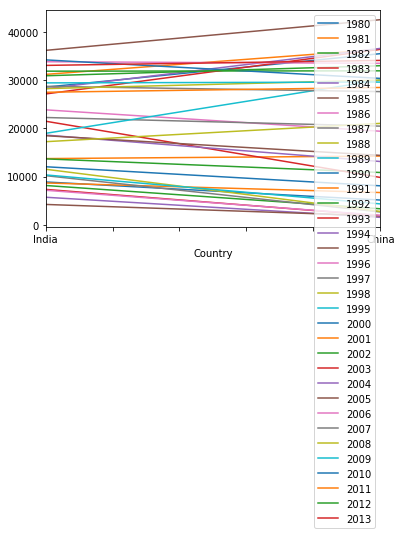

In [10]:
ci.plot(kind='line')
plt.show()

In [11]:
ci=ci.transpose()
ci.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


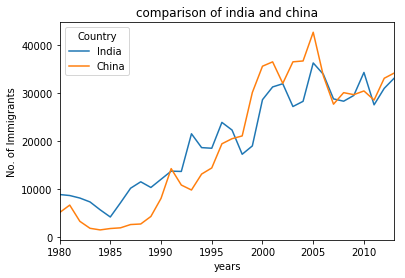

In [12]:
ci.plot(kind='line')
plt.xlabel('years')
plt.ylabel('No. of Immigrants')
plt.title('comparison of india and china')
plt.show()

In [31]:
top=data['Total'].sort_values(ascending=False).head()

In [32]:
top

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

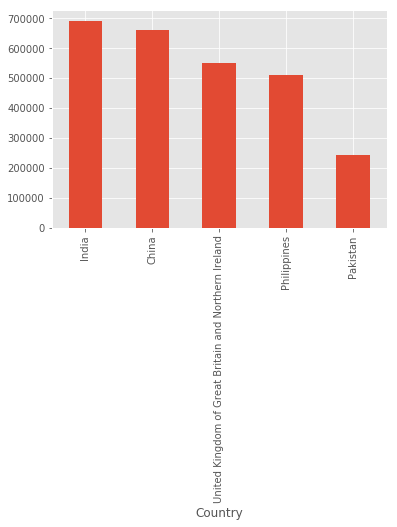

In [33]:
top.plot(kind='bar')
plt.show()

In [34]:
top1=data.loc[['India','China','United Kingdom of Great Britain and Northern Ireland','Philippines','Pakistan'],range(1980,2014)]           

In [36]:
top1=top1.transpose()
top1.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


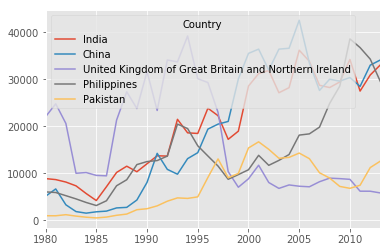

In [39]:
top1.plot(kind='line')
plt.show()

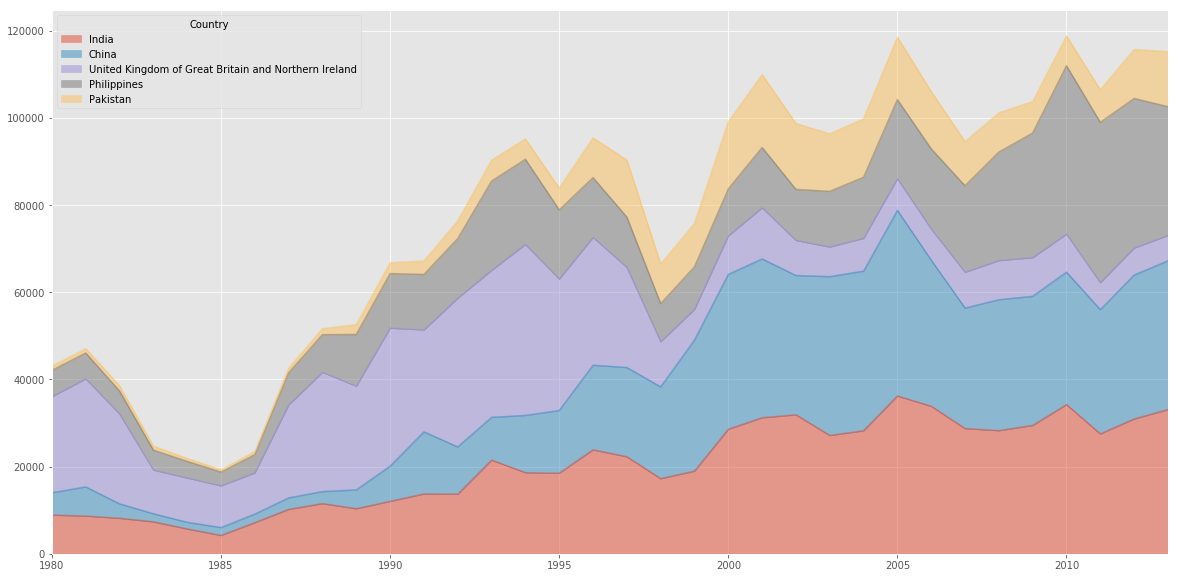

In [56]:
#scripting layer or artist layer
top1.plot(kind='area',stacked=True,alpha=0.50,figsize=(20,10))
plt.show()

In [62]:
data['Total'].sort_values(ascending=True).head(10)

Country
Palau                     1
Marshall Islands          2
Western Sahara            2
San Marino                5
New Caledonia             5
American Samoa            6
Tuvalu                    8
Sao Tome and Principe    10
Vanuatu                  11
Andorra                  15
Name: Total, dtype: int64

In [58]:
bottom=data.loc[['Palau','Marshall Islands','Western Sahara','San Marino','New Caledonia'],range(1980,2014)]
bottom=bottom.transpose()
bottom.head()

Country,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia
1980,0,0,0,1,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


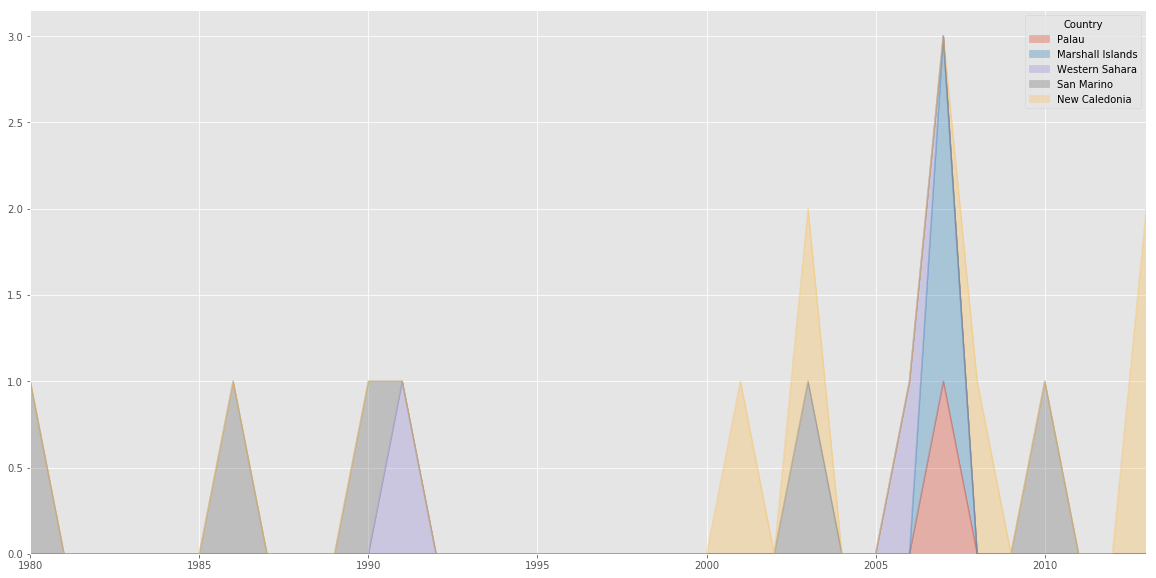

In [61]:
bottom.plot(kind='area',alpha=0.35,figsize=(20,10))
plt.show()

In [67]:
data['Total'].head(50)

Country
Afghanistan                                        58639
Albania                                            15699
Algeria                                            69439
American Samoa                                         6
Andorra                                               15
Angola                                              2113
Antigua and Barbuda                                  981
Argentina                                          19596
Armenia                                             3310
Australia                                          23829
Austria                                             4985
Azerbaijan                                          2649
Bahamas                                              808
Bahrain                                              475
Bangladesh                                         65568
Barbados                                            6923
Belarus                                             7975
Belgium                

In [74]:
data[2013].sort_values(ascending=True).head()

Country
Guinea-Bissau     0
Western Sahara    0
American Samoa    0
San Marino        0
Tuvalu            0
Name: 2013, dtype: int64

In [76]:
data[2013].sort_values(ascending=False).head()

Country
China                         34129
India                         33087
Philippines                   29544
Pakistan                      12603
Iran (Islamic Republic of)    11291
Name: 2013, dtype: int64

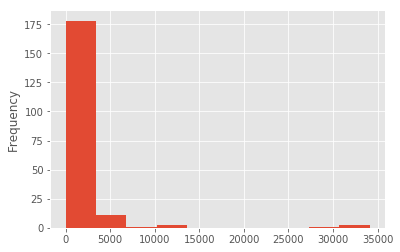

In [79]:
data[2013].plot(kind='hist')
plt.show()

In [81]:
ci=data.loc[['Denmark','Norway','Sweden'],range(1980,2014)]   #years is variable and variable cant be in quotation # no need to convert into years.
ci=ci.transpose()
ci.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


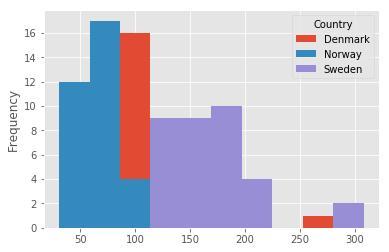

In [82]:
ci.plot(kind='hist')
plt.show()

In [93]:
ice=data.loc[['Iceland'],range(1980,2014)]
ice=ice.transpose()
ice.head()

Country,Iceland
1980,17
1981,33
1982,10
1983,9
1984,13


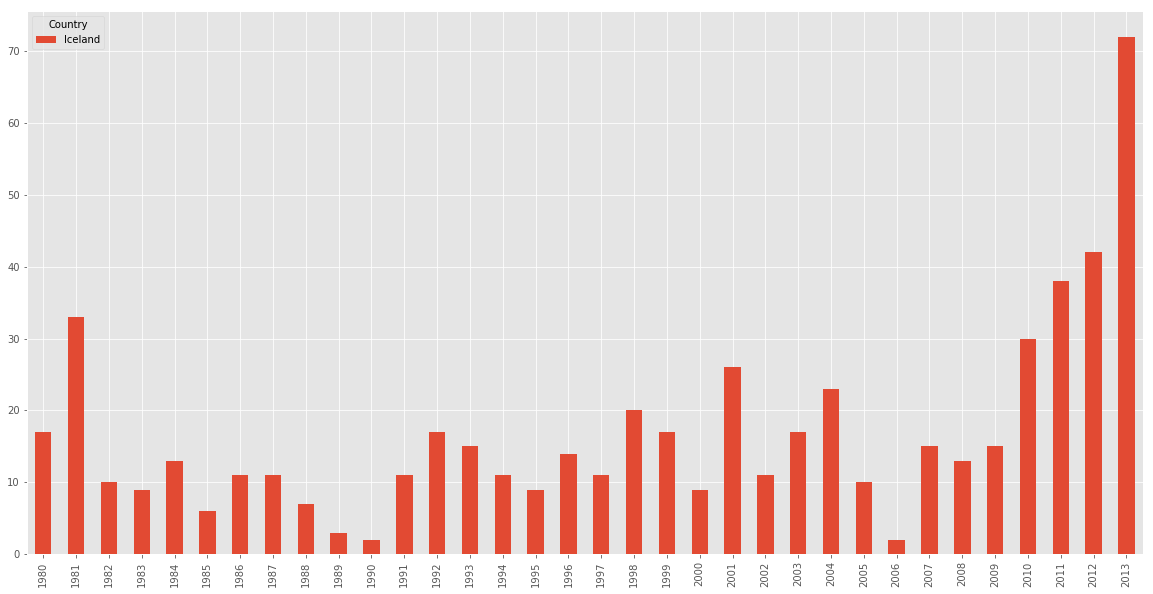

In [95]:
ice.plot(kind='bar',figsize=(20,10))
plt.show()

In [ ]:
ice.plot(kind='bar',figsize=(20,10))
plt.annotate('',xy=(32,70),xytext=(28,20),xycoords='data',arrowprops=dict(arrowstyle='-'))

In [101]:
con=data.groupby('Continent',axis=0).sum()
con1=con['Total'].sort_values(ascending=False).head()
con1

Continent
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Africa                              618948
Northern America                    241142
Name: Total, dtype: int64

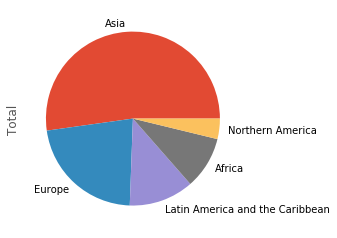

In [102]:
con1.plot(kind='pie')
plt.show()

In [103]:
con['Total']

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

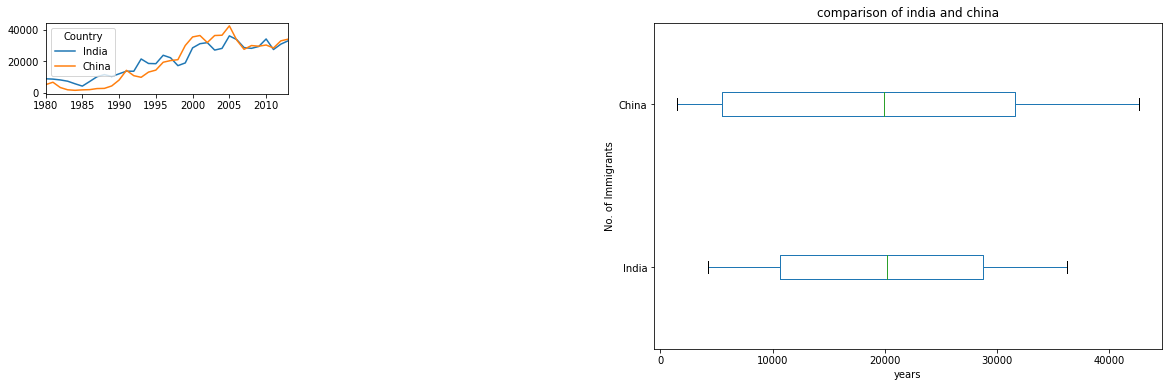

In [91]:
fig=plt.figure()
ax0=fig.add_subplot(4,4,1)
ax1=fig.add_subplot(1,2,2)
ci.plot(kind='line',figsize=(20,60),ax=ax0)
plt.xlabel('years')
plt.ylabel('No. of Immigrants')
plt.title('comparison of india and china')
ci.plot(kind='box',figsize=(20,6),vert=False,ax=ax1)
plt.xlabel('years')
plt.ylabel('No. of Immigrants')
plt.title('comparison of india and china')
plt.show()

In [66]:
brazil=data.loc[['Brazil'],range(1980,2010)]
brazil=brazil.transpose()
brazil.reset_index(inplace=True)
brazil.columns=['year','total']
brazil.head()

,year,total
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [70]:
argentina=data.loc[['Argentina'],range(1980,2010)]
argentina=argentina.transpose()
argentina.reset_index(inplace=True)
argentina.columns=['year','total']
argentina.head()

,year,total
0,1980,368
1,1981,426
2,1982,626
3,1983,241
4,1984,237


In [23]:
ba=data.loc[['Brazil','Argentina'],range(1980,2010)]
ba=ba.transpose()
ba.head()

Country,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [28]:
year=data.loc[:,range(1980,2010)]
year

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746
Albania,1,0,0,0,0,0,1,2,2,3,...,1816,1602,1021,853,1450,1223,856,702,560,716
Algeria,80,67,71,69,63,44,69,132,242,434,...,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,0,2,0,0,1,1,0,0
Angola,1,3,6,6,4,3,5,5,11,6,...,70,169,168,165,268,295,184,106,76,62
Antigua and Barbuda,0,0,0,0,42,52,51,61,34,51,...,13,25,17,25,14,24,32,15,32,38
Argentina,368,426,626,241,237,196,213,519,374,538,...,427,635,865,1745,1591,1153,847,620,540,467
Armenia,0,0,0,0,0,0,0,0,0,0,...,124,87,132,153,147,224,218,198,205,267


In [48]:
dt=pd.DataFrame(data.sum(axis=0))

In [50]:
dt.head()

,0
Continent,AsiaEuropeAfricaOceaniaEuropeAfricaLatin Ameri...
Region,Southern AsiaSouthern EuropeNorthern AfricaPol...
DevName,Developing regionsDeveloped regionsDeveloping ...
1980,99137
1981,110563


In [51]:
data.append(dt)

,0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,Continent,DevName,Region,Total,total
Afghanistan,NaN,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,...,1746.0,1758.0,2203.0,2635.0,2004.0,Asia,Developing regions,Southern Asia,58639.0,NaN
Albania,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,716.0,561.0,539.0,620.0,603.0,Europe,Developed regions,Southern Europe,15699.0,NaN
Algeria,NaN,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,...,5393.0,4752.0,4325.0,3774.0,4331.0,Africa,Developing regions,Northern Africa,69439.0,NaN
American Samoa,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Oceania,Developing regions,Polynesia,6.0,NaN
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,Europe,Developed regions,Southern Europe,15.0,NaN
Angola,NaN,1.0,3.0,6.0,6.0,4.0,3.0,5.0,5.0,11.0,...,62.0,61.0,39.0,70.0,45.0,Africa,Developing regions,Middle Africa,2113.0,NaN
Antigua and Barbuda,NaN,0.0,0.0,0.0,0.0,42.0,52.0,51.0,61.0,34.0,...,38.0,27.0,37.0,51.0,25.0,Latin America and the Caribbean,Developing regions,Caribbean,981.0,NaN
Argentina,NaN,368.0,426.0,626.0,241.0,237.0,196.0,213.0,519.0,374.0,...,467.0,459.0,278.0,263.0,282.0,Latin America and the Caribbean,Developing regions,South America,19596.0,NaN
Armenia,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,267.0,252.0,236.0,258.0,207.0,Asia,Developing regions,Western Asia,3310.0,NaN
Australia,NaN,702.0,639.0,484.0,317.0,317.0,319.0,356.0,467.0,410.0,...,1018.0,933.0,851.0,982.0,1121.0,Oceania,Developed regions,Australia and New Zealand,23829.0,NaN


In [52]:
years=range(1980,2010)

In [55]:
dat=data.drop(columns={'Total','total'})

In [56]:
dat.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [57]:
#pd.crosstab(margins=True,margins_name="Total Count").....issue with an index and columns

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

In [60]:
tot=pd.DataFrame(data[years].sum(axis=0))
tot.reset_index(inplace=True)
tot.columns=['year','total']
tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


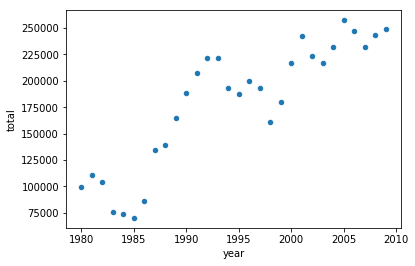

In [62]:
tot.plot(kind='scatter',x='year',y='total')
plt.show()

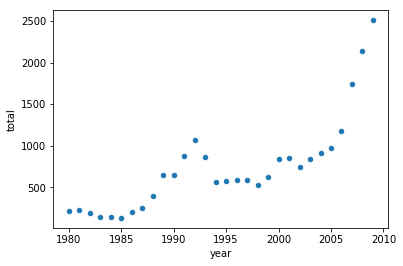

In [67]:
brazil.plot(kind='scatter',x='year',y='total')
plt.show()

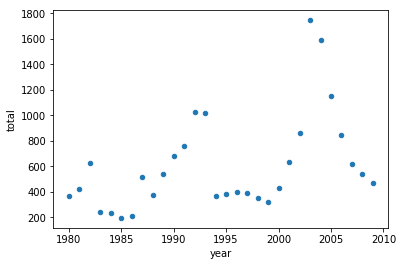

In [71]:
argentina.plot(kind='scatter',x='year',y='total')
plt.show()

<Figure size 432x288 with 0 Axes>

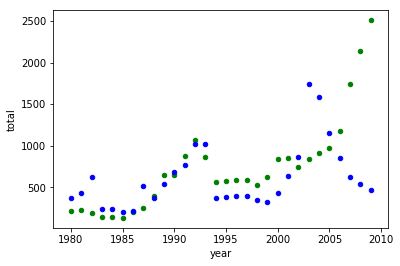

In [83]:
fig=plt.figure()
ax0=brazil.plot(kind='scatter',x='year',y='total',color='green')
argentina.plot(kind='scatter',x='year',y='total',ax=ax0,color='blue')
plt.show()

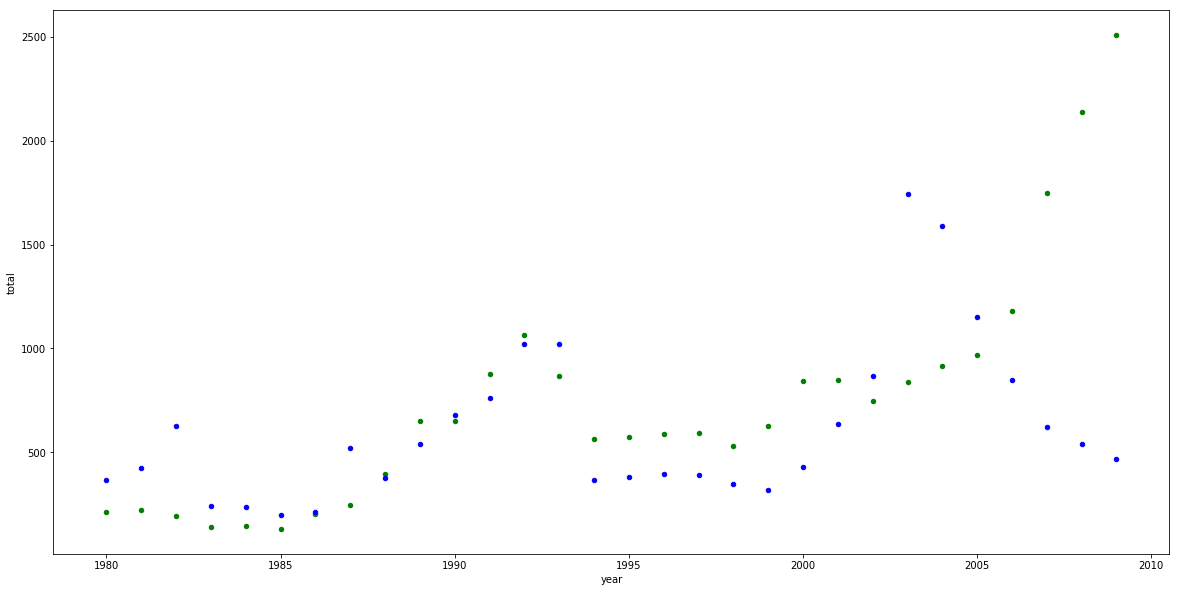

In [93]:
fig=plt.figure()
ax0=fig.add_subplot(1,1,1)
brazil.plot(kind='scatter',x='year',y='total',color='green',ax=ax0,figsize=(20,10))
argentina.plot(kind='scatter',x='year',y='total',ax=ax0,color='blue')
plt.show()